# Team Members :

1. Kuldeep Singh Bhandari (111601009)
2. Amit Vikram Singh (111601001)

**Aim** : To implement multi-armed bandit problem using Upper Confidence Bound Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
k = 5    # number of arms
N = 10000    # number of rounds in an experiment

### All k-arms have Bernoulli distribution
Assuming each arm has bernoulli distribution with parameter p. We will select parameter p for k-arms randomly via numpy.random.rand() which selects a value from a uniform distribution over [0, 1).

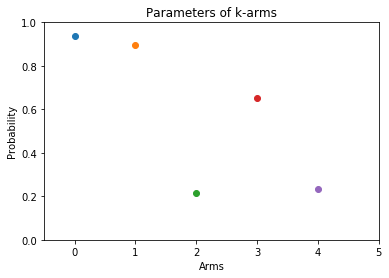

In [3]:
values = np.random.rand(k, )
for i in range(k) :
    plt.scatter(i, values[i])
plt.xlabel("Arms")
plt.ylabel("Probability")
plt.title("Parameters of k-arms")
plt.axis([-0.5, k, 0, 1])
plt.show()

Iteration  0
0
Iteration  1000
0
Iteration  2000
0
Iteration  3000
0
Iteration  4000
0
Iteration  5000
0
Iteration  6000
1
Iteration  7000
0
Iteration  8000
0


KeyboardInterrupt: 

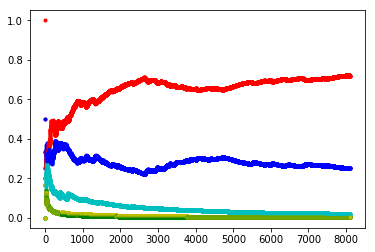

In [4]:
# Utility function 
def loge(n) :
    return math.log(n)/math.log(np.e)

sum_of_rewards = [0 for i in range(k)]
number_of_selections = [0 for i in range(k)]
arms_selected = []
total_rewards = 0
simulation = []
colors = ['r.', 'b.', 'g.', 'c.', 'y.', 'k.']
for t in range(N) :
    max_ucb = 0
    best_arm = 0
    # Find best arm for round <i>
    for arm in range(k) :
        # Calculate UCB for the arm
        if(number_of_selections[arm] > 0) :
            average_reward = sum_of_rewards[arm] / number_of_selections[arm]
            diff = math.sqrt(2 * loge(t) / number_of_selections[arm])
            ucb = average_reward + diff
        else :
            ucb = 1e10
            
        if(ucb > max_ucb) :
            max_ucb = ucb
            best_arm = arm
    if(t % 1000 == 0) :
        print("Iteration ", t)
        print(best_arm)
#     simulation.append(best_arm)
#     plt.plot(t, best_arm, colors[best_arm])
    arms_selected.append(best_arm)
    # Update 
    number_of_selections[best_arm] += 1
    if(np.random.rand() <= values[best_arm]) :
        sum_of_rewards[best_arm] += 1
        total_rewards += 1
    for i in range(k) :
        plt.plot(t, (number_of_selections[i]/(t+1)), colors[i])
plt.axis([-1, N, 0, 1])
plt.xlabel("Number of round")
plt.ylabel("% of Arm selected")
plt.title("Simulation of k-armed bandit")
plt.show()
plt.plot()

best_arm = max(arms_selected, key=arms_selected.count)
print("Optimal Arm : ", best_arm)
print("Total Rewards :", total_rewards)

plt.hist(arms_selected, bins=5)
plt.axis([0, 5, 0, N])
plt.show()

In [ ]:
regret = [0 for i in range(N)]
regret[0] = values[best_arm] - values[arms_selected[0]]
regretList = []
regretList.append(regret[0])
for i in range(1, N) :
    delta = (values[best_arm] - values[arms_selected[i]])
    regret[i] = regret[i-1] + delta
    regretList.append(regret[i]/(i+1))
    if(i % 500 == 0) :
        print("Iteration ", i)
        print("Regret after round", (i) , " : ", regret[i])
print("Total Regret (after rounds n) : ", regret[N-1])
print("(Total Regret) / (Number of rounds) : ", regret[N-1]/N)
plt.plot(regretList, 'b.')
plt.show()